In [2]:
'''
Q1. Implement Linear Regression
Dataset: Use the Advertising.csv
(https:/raw.githubusercontent.com/selva86/datasets/master/Advertising.csv) 
Task:
I. Load the dataset and use TV. Radio, and Newspaper as features to predict Sales
II. Split the data into training and testing sets
III. Implement and train a Linear Regression model using scikit-learn.
IV Calculate and print the Mean Squared Ertor (MSE) and R-squared (R^2) score for the test set.
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Use TV, radio, and newspaper as features to predict sales
X = data[["TV", "radio", "newspaper"]]
y = data["sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R-squared (R^2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2) Score: {r2:.2f}")

Mean Squared Error (MSE): 3.17
R-squared (R^2) Score: 0.90


Accuracy: 1.00


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


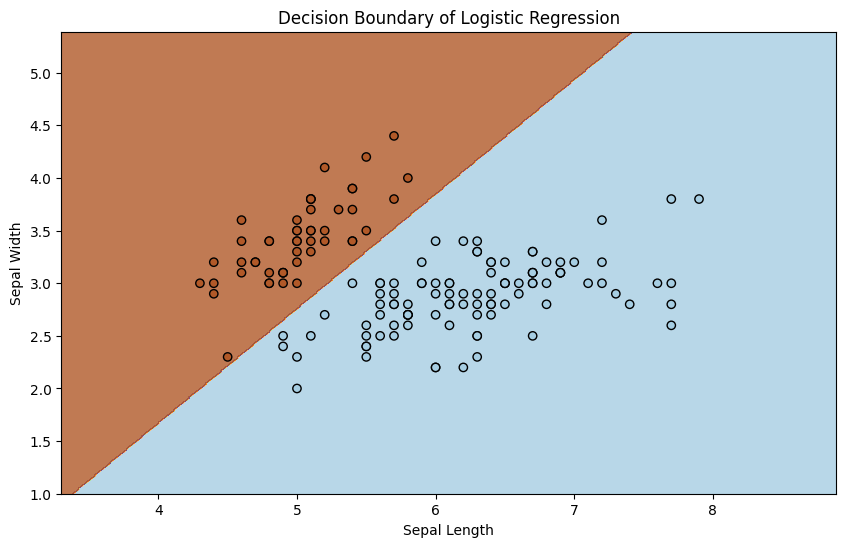

In [8]:
'''
Q2. Implement Logistic Regression
Dataset. Use the Iris Dataset from (https: raw.githubusercontent.com/utuc-cse/data-fa14/gh-pages/data/iris.csv)
Task: 
I. Load the dataset and classify whether the flower is "Iris-setosa" (binary classification)
II. Use sepal length and sepal width as features.
III. Train a Logistic Regression model using scikit-learn
IV. Visualize the decision boundary
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
data = pd.read_csv(url)

# Filter for binary classification: "setosa" vs others
data["Target"] = (data["species"] == "setosa").astype(int)  # 1 for "setosa", 0 otherwise

# Use sepal length and sepal width as features
X = data[["sepal_length", "sepal_width"]]
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary
x_min, x_max = X["sepal_length"].min() - 1, X["sepal_length"].max() + 1
y_min, y_max = X["sepal_width"].min() - 1, X["sepal_width"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X["sepal_length"], X["sepal_width"], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary of Logistic Regression")
plt.show()


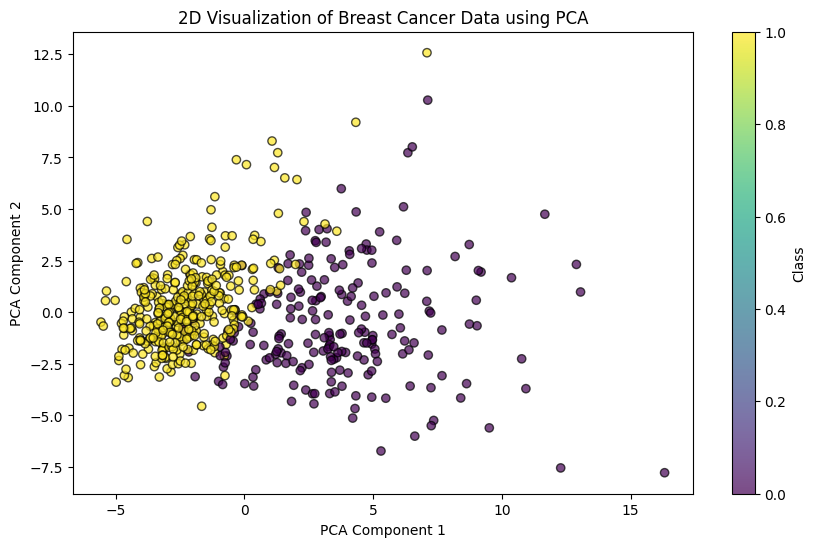

Explained Variance Ratio of PCA Components: [0.44272026 0.18971182]


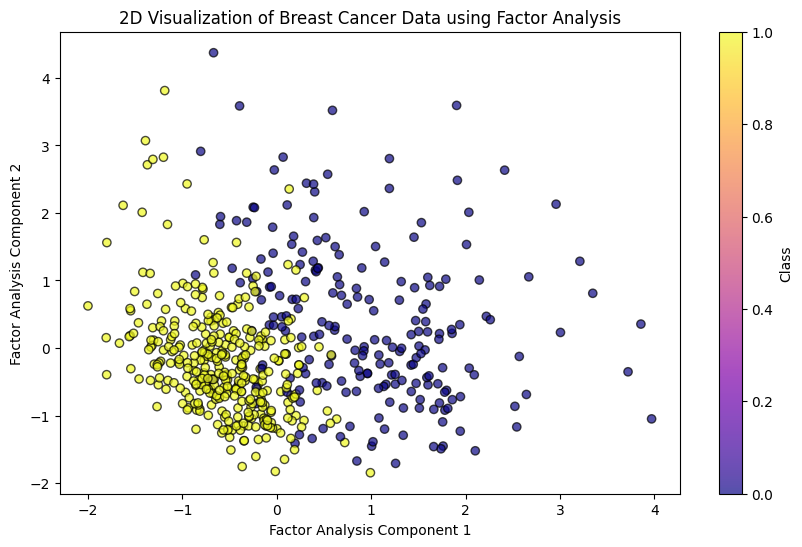

In [9]:
'''
Q3. Load the dataset using the python command "from sklearn datasets import load_breast_cancer". Then do the following tasks:
1. Load the dataset and perform standard scaling on the features.
II. Apply PCA to reduce the dimensionality to 2 components
111. Visualize the data in 2D with PCA components as axes.
IV. Explain the explained variance ratio.
V. Implement Probabilistic PCA using Factor Analysis from sklearn.decomposition.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

# Standard scaling on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the data in 2D with PCA components as axes
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Breast Cancer Data using PCA')
plt.colorbar(label='Class')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio of PCA Components: {explained_variance_ratio}")

# Implement Probabilistic PCA using Factor Analysis
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
X_fa = factor_analysis.fit_transform(X_scaled)

# Visualize the data in 2D with Factor Analysis components as axes
plt.figure(figsize=(10, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y, cmap='plasma', edgecolor='k', alpha=0.7)
plt.xlabel('Factor Analysis Component 1')
plt.ylabel('Factor Analysis Component 2')
plt.title('2D Visualization of Breast Cancer Data using Factor Analysis')
plt.colorbar(label='Class')
plt.show()

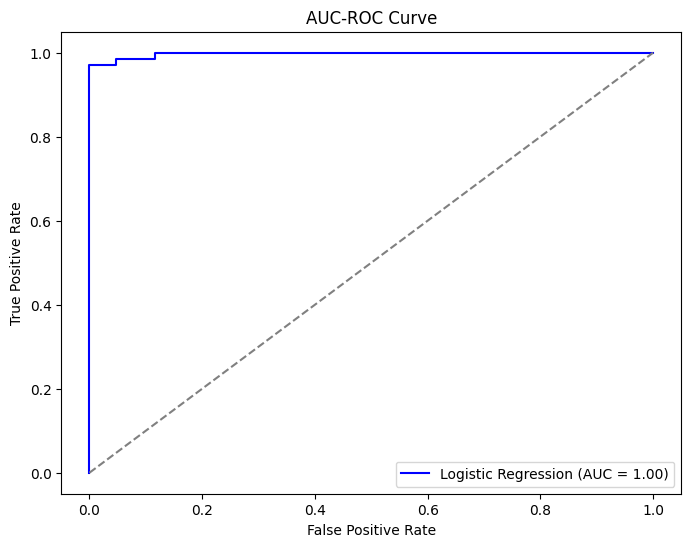

AUC Score: 1.00


In [11]:
'''
Q4. Compute and Plot AUC-ROC
Dataset: Use the following python command to get data: 
from sklearn.datasets import load breast cancer
data = load_breast_cancer()
X=data.data
y=data.target
Task:
I. Train a Logistic Regression model to classify cancer
II. Compute the probabilities of the positive class.
III. Plot the AUC-ROC curve using sklearn.metrics.roc_curve and calculate the AUC score.
'''

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Compute the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Compute AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate the AUC score
print(f"AUC Score: {roc_auc:.2f}")

In [ ]:
'''
Q5. Implement a Simple Neural Network
Dataset: Use the following command to get data:
from tensorflow.keras.datasets import mnist
(x train, y train), (x_test, y_test) = mnist.load_data()

Task:
1. Load and preprocess the MNIST dataset (flatten and normalize the images).
Π. Build a Neural Network using Sequential from tensorflow.keras.
Input layer: Flatten the image to a vector.
Hidden layers: Two layers with 128 neurons each, ReLU activation.
Output layer: 10 neurons with softmax activation.
Compile the model using adam optimizer and sparse_categorical_crossentropy loss. in the model for 5 epochs and evaluate its accuracy on the test set.
'''